Here in this project we are going to predict the price of the house.

# # importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import ttest_ind
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_1samp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# importing the dataset from local System
data1=pd.read_csv('desktop/data.csv')

In [3]:
data1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAT,B,LSTAT,MEDV,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN,NaN,NaN


In [4]:
data1.info() # looking for information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    int64  
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    int64  
 9   TAX          506 non-null    int64  
 10  PTRAT        506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  MEDV         506 non-null    float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
dtypes: float64(14), int64(3)
memory usage: 67.3 KB


From the above output we can see that there are 3 columns(namely Unnamed 14,Unnamed 15,Unnamed 16) which have NaN as input.These were created when the dataset was being converted to csv format in excel. So we need to delete those rows.

In [5]:
# deleting the uncessary columns
data1.drop(["Unnamed: 14", "Unnamed: 15","Unnamed: 16"], axis = 1, inplace = True) 

# checking the head,shape,info and description
data1.shape

(506, 14)

In [6]:
data1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAT,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PTRAT   506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MEDV    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Now the irrelevant columns have been deleted and we are good to work on it.

## Understanding data 

In [8]:
data1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAT,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# creating corelational matrix 
corrmatrix=data1.corr()
print(corrmatrix)

           CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM   1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN    -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS  0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS  -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX    0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM    -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE    0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS   -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD    0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX    0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRAT  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B     -0.385064  0.175520 -0.356977  0.048788 -0.380

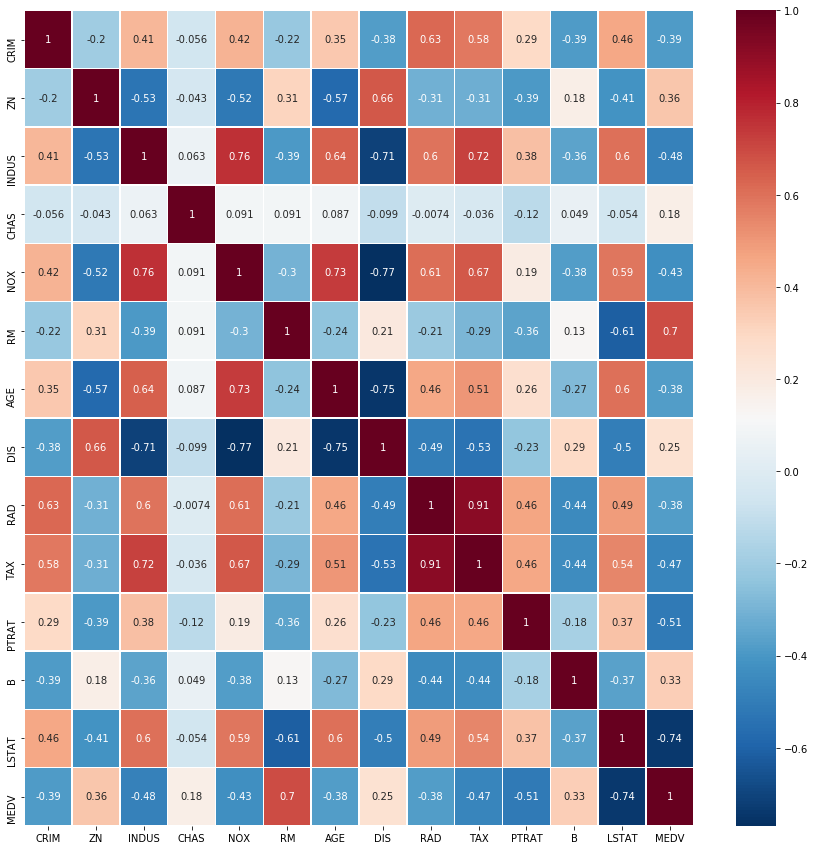

In [10]:
# creating a heatmap for corelational matrix
plt.figure(figsize=(15,15))
sns.heatmap(corrmatrix,
           xticklabels=data1.columns,
           yticklabels=data1.columns,
           cmap='RdBu_r',
           annot=True,
           linewidth=0.5)

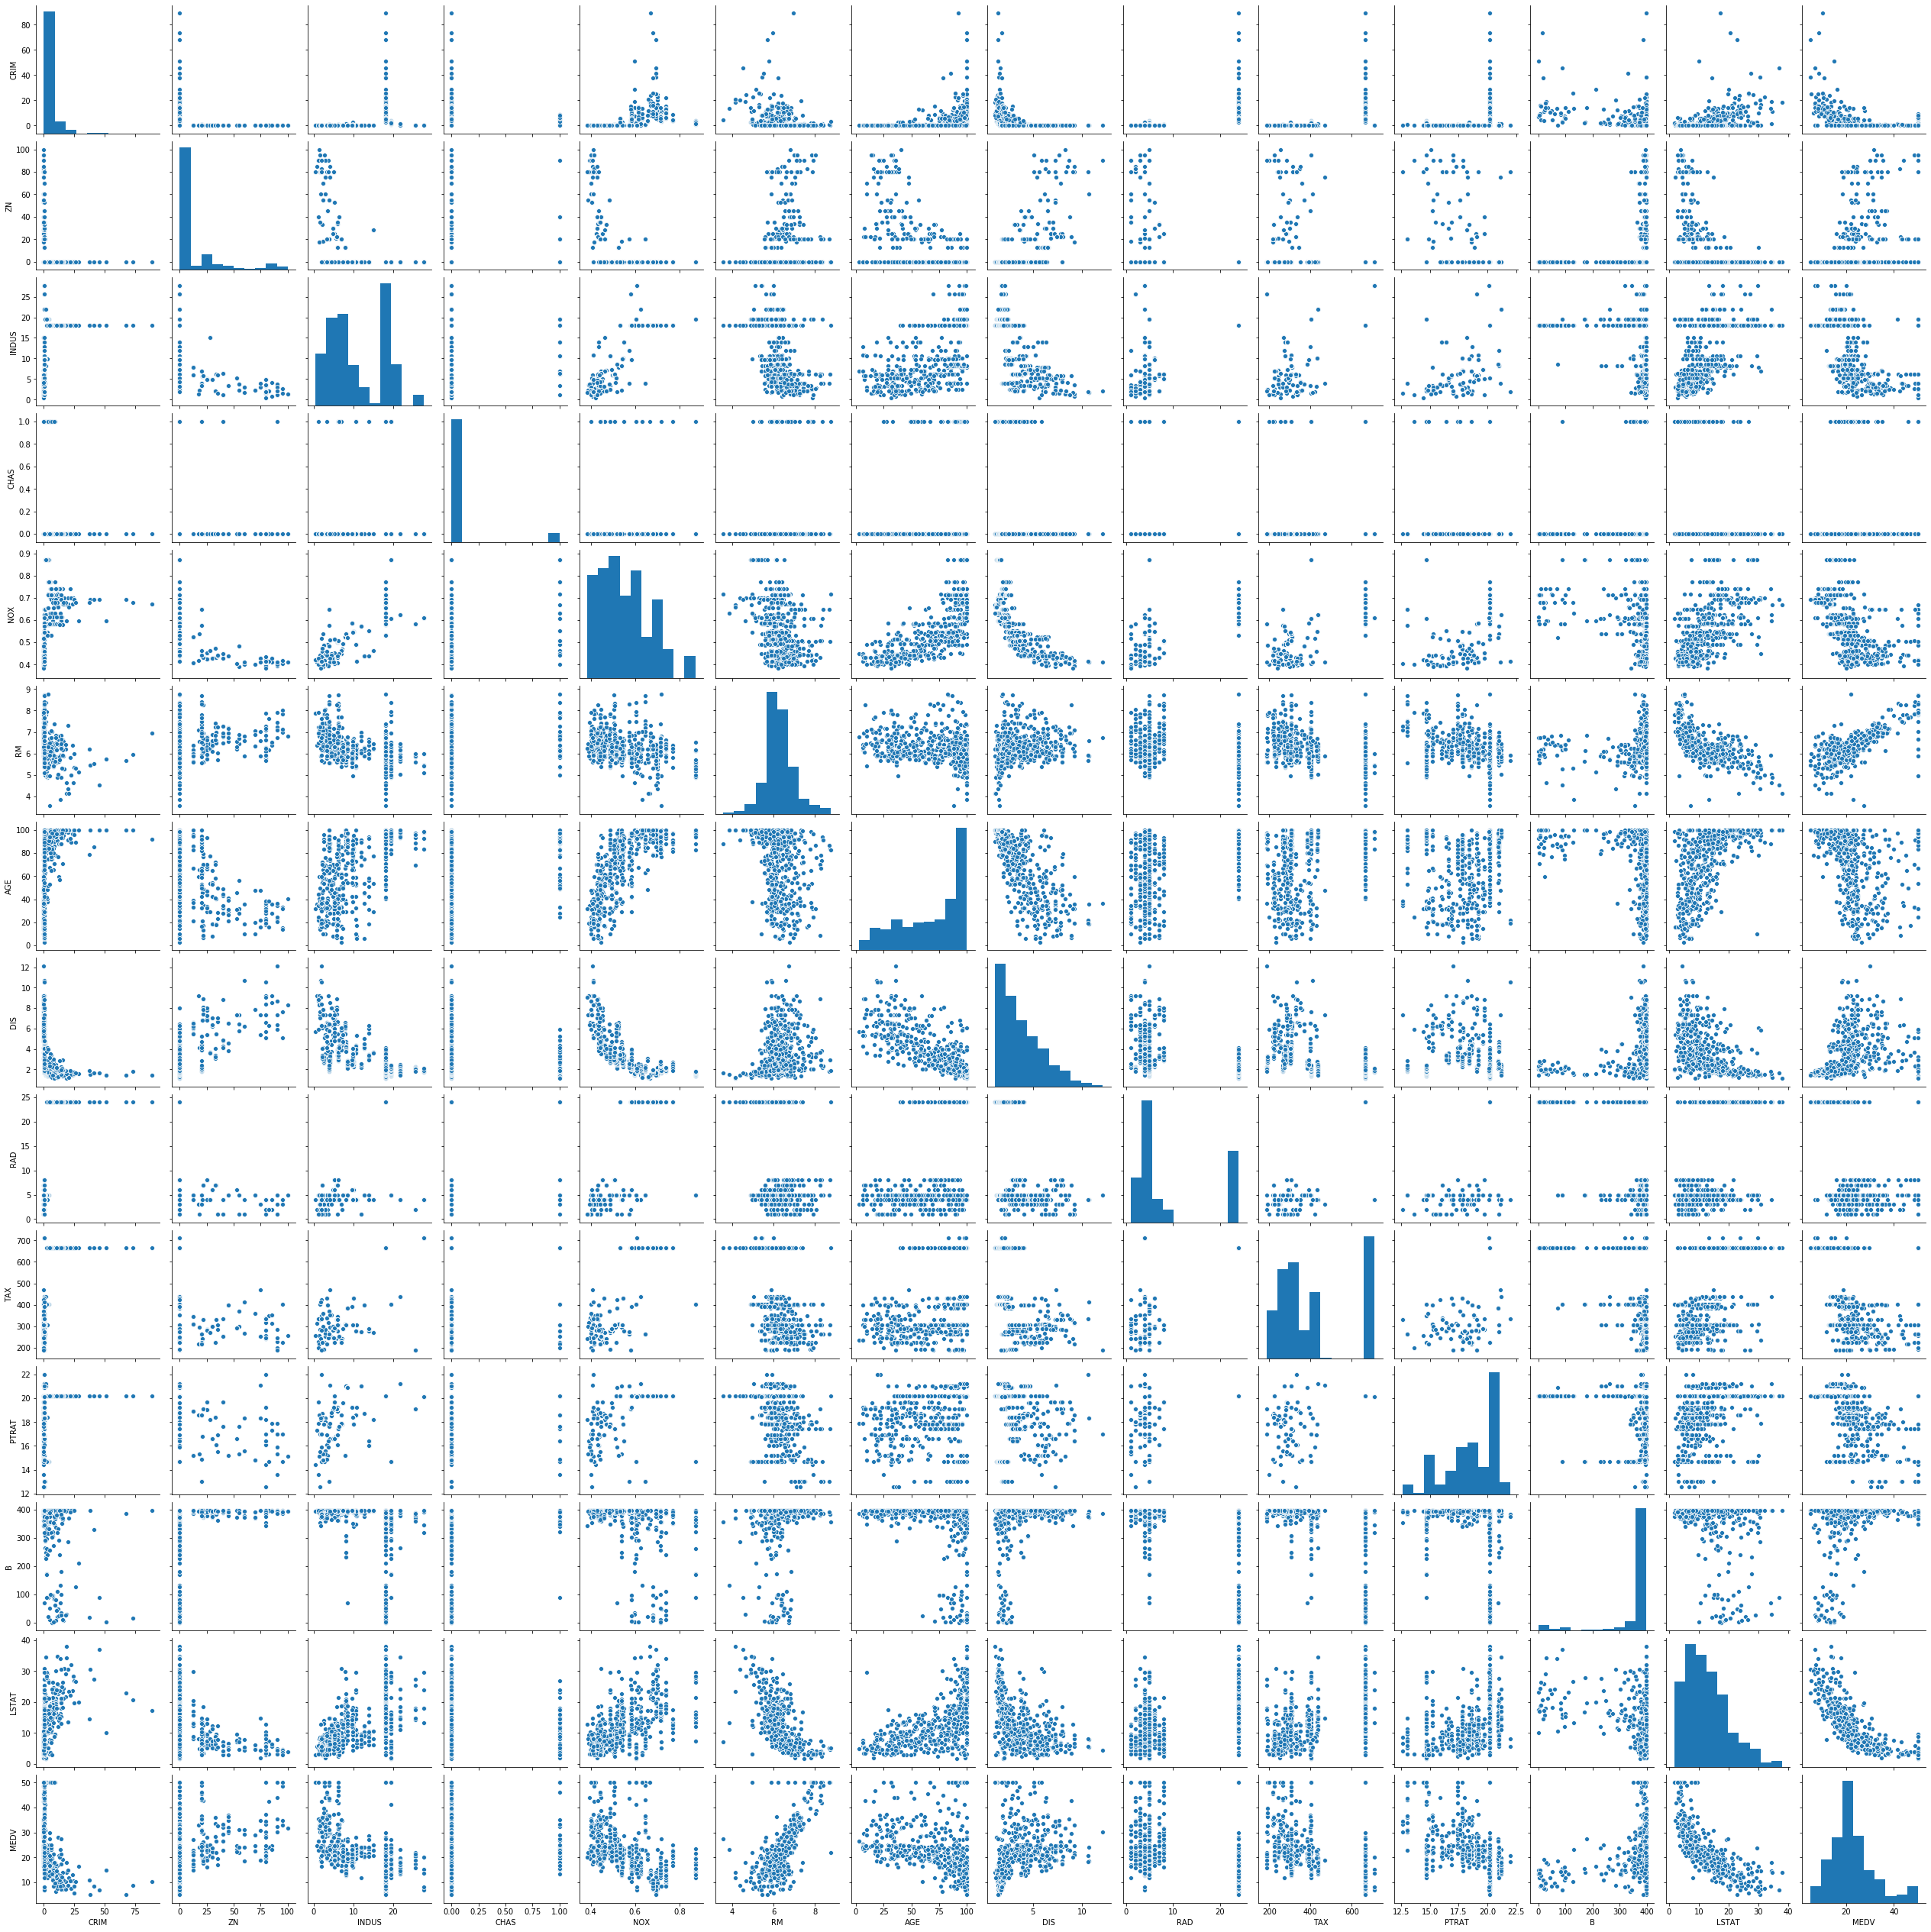

In [11]:
sns.pairplot(data1) # creating pair plots

## Plotting plots

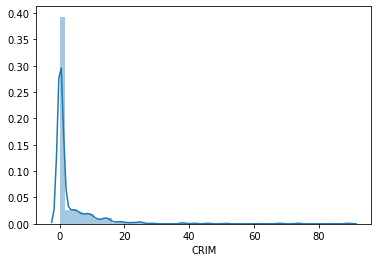

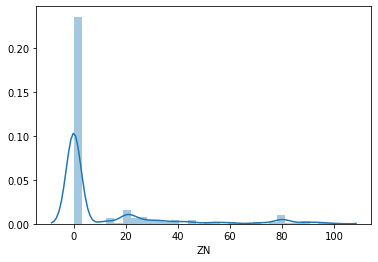

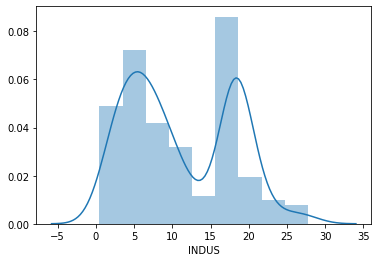

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

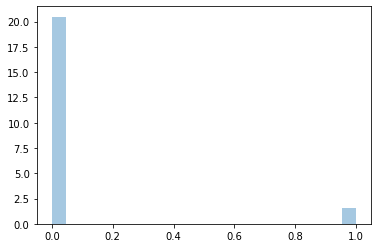

In [12]:
# histogram and density plot
for key,values in data1.iteritems():
    sns.distplot(data1[key])
    plt.show()

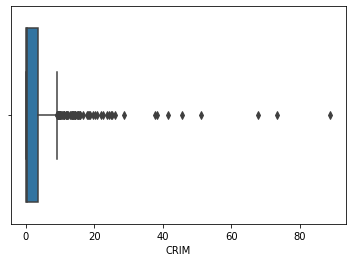

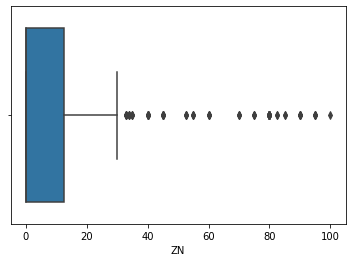

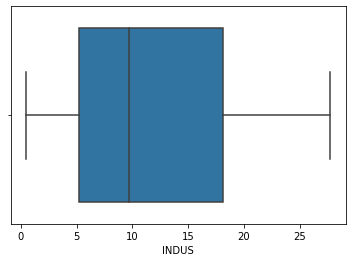

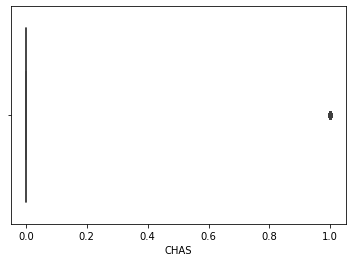

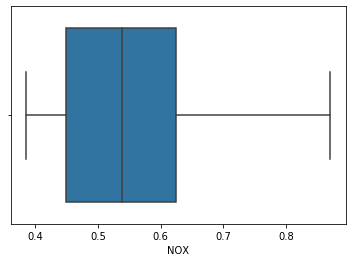

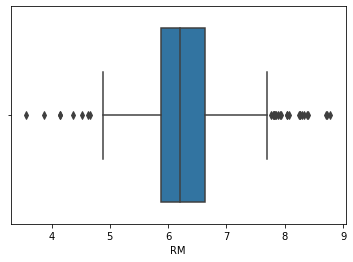

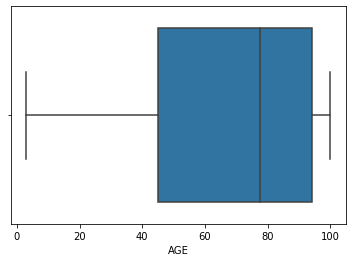

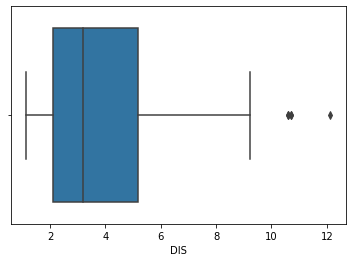

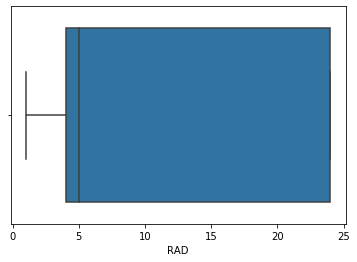

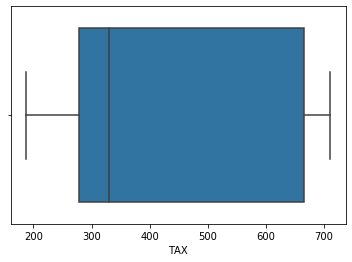

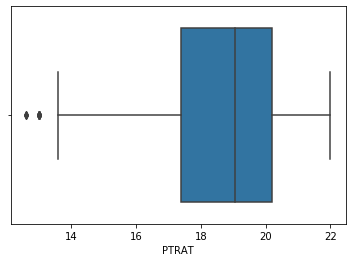

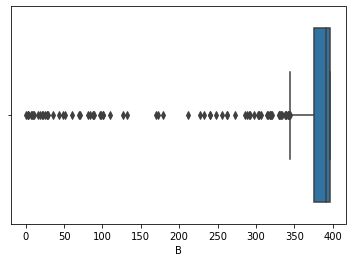

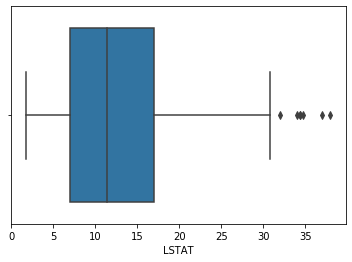

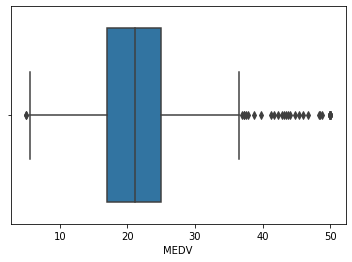

In [13]:
# box plot
for key,values in data1.iteritems():
    sns.boxplot(data1[key])
    plt.show()

## hypothesis testing

null hypo: there is no relationship between indus and nox

alt hypo : there is relation between indus and nox

In [14]:
ttest_ind(data1['INDUS'],data1['NOX'],equal_var=False)

Ttest_indResult(statistic=34.69269542218265, pvalue=8.5899100190809e-136)

null hypo: there is no relationship between indus and tax

alt hypo : there is relation between indus and tax

In [15]:
ttest_ind(data1['INDUS'],data1['TAX'],equal_var=False)

Ttest_indResult(statistic=-52.95664948426214, pvalue=1.1340697505330488e-208)

null hypo: there is no relationship between nox and age

alt hypo : there is relation between nox and age

In [16]:
ttest_ind(data1['NOX'],data1['AGE'],equal_var=False)

Ttest_indResult(statistic=-54.35615013109997, pvalue=3.6102073312574973e-213)

null hypo: there is no relationship between rm and medv

alt hypo : there is relation between rm and medv

In [17]:
ttest_ind(data1['RM'],data1['MEDV'],equal_var=False)

Ttest_indResult(statistic=-39.62461149680032, pvalue=6.317182597534784e-158)

null hypo: there is no relationship between rad and tax

alt hypo : there is relation between rad and tax

In [18]:
ttest_ind(data1['RAD'],data1['TAX'],equal_var=False)

Ttest_indResult(statistic=-53.14149450259023, pvalue=1.4950071880778505e-209)

null hypo: there is no relationship between indus and tax

alt hypo : there is relation between indus and tax

In [19]:
stats.ttest_rel(data1['TAX'],data1['INDUS'])

Ttest_relResult(statistic=54.57941707140273, pvalue=6.209058154456404e-214)

null hypo: there is no relationship between rad and indus

alt hypo : there is relation between rad and indus

In [20]:
stats.ttest_rel(data1['RAD'],data1['INDUS'])

Ttest_relResult(statistic=-4.962142074803799, pvalue=9.545414053982216e-07)

null hypo: there is no relationship between medv and age

alt hypo : there is relation between medv and age

In [21]:
ttest_ind(data1['MEDV'],data1['AGE'],equal_var=False)

Ttest_indResult(statistic=-34.97390494622517, pvalue=4.941781074314272e-148)

we ae going to perform a chi square test 

null hypo: As the tax(tax>300) increases the price of house does not increase

alt hypo: As the tax increases the price of house increases

In [22]:
tax_more_300=data1[data1['TAX']>300]
tax_more_300

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAT,B,LSTAT,MEDV
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5


In [23]:
stats.chi2_contingency(tax_more_300,data1['MEDV'])

(55839.41788475457,
 0.0,
 4329,
 array([[  4.63269638,   6.74258668,  11.54193781, ..., 290.39751045,
          12.46562342,  17.28946038],
        [  4.86036174,   7.07393873,  12.10914516, ..., 304.66856303,
          13.0782236 ,  18.13911917],
        [  4.82522347,   7.02279727,  12.02160137, ..., 302.46594348,
          12.9836738 ,  18.00798133],
        ...,
        [  5.01016819,   7.29197222,  12.48237417, ..., 314.05908116,
          13.48132162,  18.69820451],
        [  5.03722102,   7.33134585,  12.54977382, ..., 315.75487005,
          13.55411517,  18.79916707],
        [  5.07198353,   7.38194041,  12.63638142, ..., 317.93393506,
          13.64765387,  18.92890254]]))

In [24]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(tax_more_300,data1['MEDV'])
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
55839.41788475457


===Degrees of Freedom===
4329


===P-Value===
0.0


===Contingency Table===
[[  4.63269638   6.74258668  11.54193781 ... 290.39751045  12.46562342
   17.28946038]
 [  4.86036174   7.07393873  12.10914516 ... 304.66856303  13.0782236
   18.13911917]
 [  4.82522347   7.02279727  12.02160137 ... 302.46594348  12.9836738
   18.00798133]
 ...
 [  5.01016819   7.29197222  12.48237417 ... 314.05908116  13.48132162
   18.69820451]
 [  5.03722102   7.33134585  12.54977382 ... 315.75487005  13.55411517
   18.79916707]
 [  5.07198353   7.38194041  12.63638142 ... 317.93393506  13.64765387
   18.92890254]]


we can reject the null hypo as p value 0.0

## Model Building with Linear Regression

 features which are highly corelated with target variable

In [25]:
corrmatrix.index.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRAT', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [26]:
def correlatedfeature(corr_data, threshold):
    """Function to get features which are correlated to target variable with a particulat threshold"""
    feature=[]
    value=[]
    
    for i, index in enumerate(corr_data.index):
        if abs(corr_data[index])>threshold:
            feature.append(index)
            value.append(corr_data[index])
            
    df=pd.DataFrame(data= value, index = feature, columns=['corr_value'])
    return df

threshold=0.50
corrvalue=correlatedfeature(corrmatrix['MEDV'], threshold)
corrvalue

,corr_value
RM,0.695360
PTRAT,-0.507787
LSTAT,-0.737663
MEDV,1.000000


In [27]:
corrvalue.index.values

array(['RM', 'PTRAT', 'LSTAT', 'MEDV'], dtype=object)

In [28]:
correlateddata=data1[corrvalue.index]
correlateddata.head()

,RM,PTRAT,LSTAT,MEDV
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


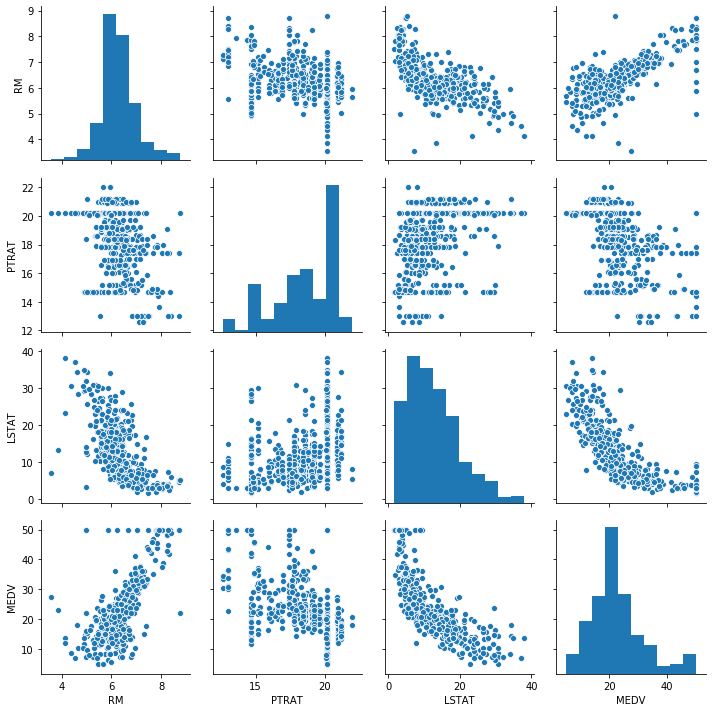

In [29]:
sns.pairplot(correlateddata)
plt.tight_layout()

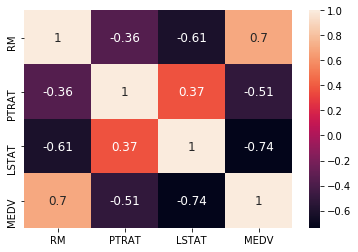

In [30]:
sns.heatmap(correlateddata.corr(), annot=True, annot_kws={'size':12})

Shuffel and split data

In [31]:
x=correlateddata.drop(labels=["MEDV"], axis=1)
y=correlateddata["MEDV"]
x.head()

,RM,PTRAT,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [32]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0) # splitting the dataset
X_train.shape,X_test.shape

((404, 3), (102, 3))

In [33]:
model=LinearRegression()
model.fit(X_train, y_train) # tranning our model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
 y_predict=model.predict(X_test) # predicting the model
df=pd.DataFrame(data= [y_predict,y_test]) # looking the value of test and predicted value side by side
df.T

,0,1
0,27.609031,22.6
1,22.099034,50.0
2,26.529255,23.0
3,12.507986,8.3
4,22.254879,21.2
...,...,...
97,28.271228,24.7
98,18.467419,14.1
99,18.558070,18.7
100,24.681964,28.1


## Evaluating model (linear regression ) performance 

In [35]:
correlateddata.columns

Index(['RM', 'PTRAT', 'LSTAT', 'MEDV'], dtype='object')

In [36]:
score=r2_score(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
print('R2 score', score)
print('mae:',mae)
print('mse:',mse)


R2 score 0.4881642015692508
mae: 4.404434993909257
mse: 41.67799012221682


In [37]:
#Storing feature performance for the above features selected for model building
total_feature_trained=[]
total_feature_name=[]
selected_correlation_value=[]
r2_scores=[]
mae_value=[]
mse_value=[]


def performance_metrics(features, th, y_true, y_pred):
    """Function for calculating performance matrix for different features selected"""
    scores=r2_score(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)   
    
    
    total_feature_trained.append(len(features)-1)
    total_feature_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    dataframe_metrics=pd.DataFrame(data=[total_feature_name,total_feature_trained,selected_correlation_value,r2_scores,
                                         mae_value,mse_value],
                                  index=['Feature Name','Total Feature','Corr value','r2 score','MAE','MSE'])
    return dataframe_metrics.T


performance_metrics(correlateddata.columns.values,threshold,y_test,y_predict)

,Feature Name,Total Feature,Corr value,r2 score,MAE,MSE
0,['RM' 'PTRAT' 'LSTAT' 'MEDV'],3,0.5,0.488164,4.40443,41.678


<bound method Figure.tight_layout of <Figure size 720x360 with 4 Axes>>

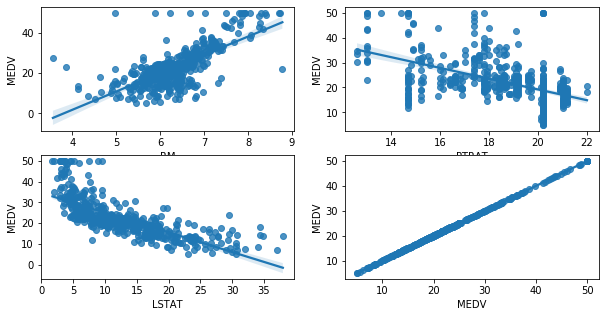

In [38]:
# regression plot of featues selected

rows=2
cols=2
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(10,5))
col=correlateddata.columns
index=0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x=correlateddata[col[index]],y=correlateddata['MEDV'], ax=ax[i][j])
        index =index+1
fig.tight_layout

In [39]:
# selecting different features with correlated value above 0.6 absolute
threshold=0.60
corr_values=correlatedfeature(corrmatrix['MEDV'], threshold)
corr_values

,corr_value
RM,0.695360
LSTAT,-0.737663
MEDV,1.000000


In [40]:
correlateddata=data1[corr_values.index]
correlateddata.head()


,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [41]:
def get_ypredict(corrdata):
    """ Function for trainning, fitting and predicting model parametes"""
    X=corrdata.drop(labels=['MEDV'], axis=1)
    y=corrdata["MEDV"]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)
    model=LinearRegression()
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    return y_predict

y_predict=get_ypredict(correlateddata)
performance_metrics(correlateddata.columns.values, threshold,y_test,y_predict)

,Feature Name,Total Feature,Corr value,r2 score,MAE,MSE
0,['RM' 'PTRAT' 'LSTAT' 'MEDV'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'MEDV'],2,0.6,0.488164,4.14244,37.3831


In [42]:
# selecting different features with correlated value above 0.7 absolute
threshold=0.70
corr_values=correlatedfeature(corrmatrix['MEDV'], threshold)
corr_values

,corr_value
LSTAT,-0.737663
MEDV,1.000000


In [43]:
correlateddata=data1[corr_values.index]
correlateddata.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [44]:
y_predict=get_ypredict(correlateddata)
performance_metrics(correlateddata.columns.values, threshold,y_test,y_predict)

,Feature Name,Total Feature,Corr value,r2 score,MAE,MSE
0,['RM' 'PTRAT' 'LSTAT' 'MEDV'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'MEDV'],2,0.6,0.488164,4.14244,37.3831
2,['LSTAT' 'MEDV'],1,0.7,0.488164,4.86401,46.3363


In [45]:
# selecting different features with correlated value above 0.4 absolute
threshold=0.40
corr_values=correlatedfeature(corrmatrix['MEDV'], threshold)
corr_values

,corr_value
INDUS,-0.483725
NOX,-0.427321
RM,0.695360
TAX,-0.468536
PTRAT,-0.507787
LSTAT,-0.737663
MEDV,1.000000


In [46]:
correlateddata=data1[corr_values.index]
correlateddata.head()

,INDUS,NOX,RM,TAX,PTRAT,LSTAT,MEDV
0,2.31,0.538,6.575,296,15.3,4.98,24.0
1,7.07,0.469,6.421,242,17.8,9.14,21.6
2,7.07,0.469,7.185,242,17.8,4.03,34.7
3,2.18,0.458,6.998,222,18.7,2.94,33.4
4,2.18,0.458,7.147,222,18.7,5.33,36.2


In [47]:
y_predict=get_ypredict(correlateddata)
performance_metrics(correlateddata.columns.values, threshold,y_test,y_predict)

,Feature Name,Total Feature,Corr value,r2 score,MAE,MSE
0,['RM' 'PTRAT' 'LSTAT' 'MEDV'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'MEDV'],2,0.6,0.488164,4.14244,37.3831
2,['LSTAT' 'MEDV'],1,0.7,0.488164,4.86401,46.3363
3,['INDUS' 'NOX' 'RM' 'TAX' 'PTRAT' 'LSTAT' 'MEDV'],6,0.4,0.488164,4.3945,42.6519


After having tried different values for threshold we can see different number of features are selected and we can see the value of performance metrics and compare which values of threshold is good.

## Model Building Decision Tree

In [48]:
X = data1.iloc[:,:-1] # selecting independent features
y = data1.iloc[:,-1] #selecting dependent feature

x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.20,random_state=42,shuffle=True)

from sklearn.tree import DecisionTreeRegressor
model= DecisionTreeRegressor(random_state=0)
model.fit(x_training_set, y_training_set)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [49]:
dt = DecisionTreeRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(dt.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}


In [50]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,10,15,20,25,30,35]
# Maximun leaf node
max_leaf_nodes=[5,10,15,20,25,30,35]
# ccp_alpha 
ccp_alpha=[0.0]
#min impurity deccrease
min_impurity_decrease=[0.4,0.5,0.6,0.7,0.8]
# Minimum number of samples required to split a node
min_samples_split = [2,3,5,7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4,5]
# criterion
criterion = ["mse", "mae"]
# Create the random grid
random_grid = {'ccp_alpha': 0.0,
 'criterion': criterion,
 'max_depth': max_depth,
 'max_features': max_features,
 'max_leaf_nodes': max_leaf_nodes,
 'min_impurity_decrease': min_impurity_decrease,
 'min_samples_leaf': min_samples_leaf,
 'min_samples_split': min_samples_split,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

pprint(random_grid)

{'ccp_alpha': 0.0,
 'criterion': ['mse', 'mae'],
 'max_depth': [5, 10, 15, 20, 25, 30, 35],
 'max_features': ['auto', 'sqrt'],
 'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 35],
 'min_impurity_decrease': [0.4, 0.5, 0.6, 0.7, 0.8],
 'min_samples_leaf': [1, 2, 4, 5],
 'min_samples_split': [2, 3, 5, 7],
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}


In [51]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
 'criterion': criterion,
 'max_depth': max_depth,
 'max_features': max_features,
 'max_leaf_nodes': max_leaf_nodes,
 'min_impurity_decrease': min_impurity_decrease,
 'min_samples_leaf': min_samples_leaf,
 'min_samples_split': min_samples_split,
 }
# Create a based model
dt = DecisionTreeRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [52]:
# Fit the grid search to the data
grid_search.fit(x_training_set, y_training_set)

Fitting 3 folds for each of 15680 candidates, totalling 47040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 2552 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 4816 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 7736 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 11296 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 15512 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 20368 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 25880 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 32032 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 38840 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 46288 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 47040 out of 47040 | elapsed:  4.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [5, 10, 15, 20, 25, 30, 35],
                         'max_featur

In [53]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 25,
 'max_features': 'sqrt',
 'max_leaf_nodes': 30,
 'min_impurity_decrease': 0.4,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [54]:
def evaluate(model, test_features, test_labels):
    """Function for evaluating the performance for diff hyperparameters"""
    predictions = model.predict(x_training_set)
    errors = abs(predictions - y_training_set)
    mape = 100 * np.mean(errors / y_training_set)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = DecisionTreeRegressor()
base_model.fit(x_training_set, y_training_set)
base_accuracy = evaluate(base_model,x_test_set, y_test_set)

Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.


In [55]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test_set,y_test_set)

Model Performance
Average Error: 2.8107 degrees.
Accuracy = 85.44%.


In [56]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -14.56%.


Here we can see that base model is highly overfitted so we would go with best parametes of grid search

## Model Building Random Forest 

In [57]:
from sklearn.model_selection import learning_curve
X = data1.iloc[:,:-1] # selecting independent features
y = data1.iloc[:,-1] #selecting dependent feature

x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.20,random_state=42,shuffle=True)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


For parameter tuning we are making grid space with randomizedsearcdcv 

In [58]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 77, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True],
 'max_depth': [10, 16, 23, 30, 36, 43, 50, 56, 63, 70, 77, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}


2 * 12 * 2 * 3 * 3 * 10 = 4320 settings

In [59]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_training_set, y_training_set)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [60]:
rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [61]:
def evaluate(model, test_features, test_labels):
    """Function for evaluating the performance for diff hyperparameters"""
    predictions = model.predict(x_training_set)
    errors = abs(predictions - y_training_set)
    mape = 100 * np.mean(errors / y_training_set)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators =5, random_state = 42)
base_model.fit(x_training_set, y_training_set)
base_accuracy = evaluate(base_model, x_test_set,y_test_set)

Model Performance
Average Error: 1.2193 degrees.
Accuracy = 93.74%.


In [62]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test_set, y_test_set)

Model Performance
Average Error: 0.8874 degrees.
Accuracy = 95.62%.


In [63]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 2.00%.


After doing the parametes tuning from randomizedsearcdcv we get a rough estimates of parameters. We also see the performance of model getting improved from the base model.

Now we have got rough estimates of parameter. So we will fine tune the parametes more with GridSearchCV. 

In [64]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [1,2,5],
    'n_estimators': [400,500,600]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(x_training_set, y_training_set)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   48.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [65]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [66]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test_set,y_test_set)

Model Performance
Average Error: 0.8517 degrees.
Accuracy = 95.78%.


In [67]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 2.18%.


We can see that performance has increased.



## Using Random Forest with .feature_importances_

In [68]:
## This line instantiates the model. 
rf = RandomForestRegressor() 
## Fit the model on your training data.
rf.fit(x_training_set, y_training_set) 
## And score it on your testing data.
rf.score(x_test_set,y_test_set)

0.8779025085722185

In [69]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x_training_set.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
RM,0.475831
LSTAT,0.337513
DIS,0.058791
CRIM,0.038557
NOX,0.018237
TAX,0.016091
PTRAT,0.015945
AGE,0.014654
B,0.012604
INDUS,0.006015


In [70]:
X=data1[['RM','LSTAT','DIS']]  # taking only top 3 features for model building
y=data1['MEDV']


x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.20,random_state=42,shuffle=True)

from sklearn.model_selection import GridSearchCV

grid_search.fit(x_training_set, y_training_set)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   46.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [71]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [72]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test_set,y_test_set)

Model Performance
Average Error: 1.0876 degrees.
Accuracy = 94.29%.


In [73]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.58%.


we can see that the performance of the model has increased by 0.54% by only using 3 features with the help of .feature_importances_ .